Mustafa Yesilyurt 64496863 CS 178, Prof. Alexander Ihler, HW 4, 11/24/19

In [1]:
# Import all required libraries
from __future__ import division # For python 2.*

import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import random

np.random.seed(0)
%matplotlib inline

## Problem 1: see end of document; it is done by hand.

## Problem 2: Decision Trees in Python

In [2]:
Xte = np.genfromtxt("data/X_test.txt",delimiter=',')
XComplete = np.genfromtxt("data/X_train.txt",delimiter=',')
Y = np.genfromtxt("data/Y_train.txt",delimiter=',')
XComplete,Y = ml.shuffleData(XComplete,Y)
XComplete = np.array(XComplete)
Y = np.array(Y)

In [3]:
X = XComplete[:,:41]

### 2.1 Print the max, min, mean, and variance of each of the first 5 features.

In [15]:
#print(X[:,0]) #every item in the zeroth feature #print(X[0,:]) #the zeroth item for every feature
#print(X[:,0].shape)
for i in range(5): #print the maximum value of each of the first 5 features
    print("Feature ", str(i)+":\nMax:",np.max(X[:,i])," Min:", np.min(X[:,i])," Mean:", np.mean(X[:,i]),
          " Variance:", np.var(X[:,i]))

Feature  0:
Max: 110285.0  Min: 0.0  Mean: 1321.1174134446987  Variance: 6747189.595085322
Feature  1:
Max: 35.0  Min: 0.0  Mean: 6.5916745251246125  Variance: 34.70690630279573
Feature  2:
Max: 51536.0  Min: 0.0  Mean: 1152.273237235619  Variance: 5376518.288798102
Feature  3:
Max: 21768.0  Min: 0.0  Mean: 234.8262548834703  Variance: 260120.83053297663
Feature  4:
Max: 27210.0  Min: 0.0  Mean: 289.75871211100633  Variance: 406615.8651128233


### 2.2 Partition X, Y into Xtr, Ytr and Xva, Yva of approx. equal size. Learn decision tree classifier. Set depth to 50 and report training and validation error rates.

In [4]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y, 0.5)

In [7]:
learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50)

In [8]:
print("Training data error rate:",learner.err(Xtr,Ytr)," ;  Validation data error rate:", learner.err(Xva,Yva))

Training data error rate: 0.0  ;  Validation data error rate: 0.40689841013203987


### 2.3 Now try varying the maxDepth parameter, which forces the tree learning algorithm to stop after at most that many levels. Test maxDepth values in the range (0, 1, 2, ..., 15), and plot the training and validation error rates versus maxDepth. Do models with higher maxDepth have higher or lower complexity? What choice of maxDepth provides the best decision tree model?

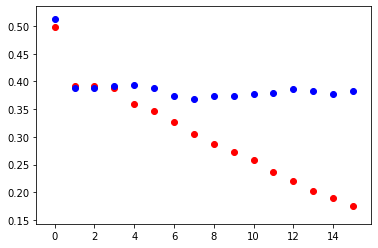

In [9]:
trainingErrors = []
validationErrors = []
num = 16
for i in range(num): #go from 0 to 15 inclusive
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=i)
    trainingErrors.append(learner.err(Xtr,Ytr))
    validationErrors.append(learner.err(Xva,Yva))
plt.scatter(np.array(range(num)), np.array(trainingErrors), c='r')
plt.scatter(np.array(range(num)), np.array(validationErrors), c='b')
plt.show()

Models with increased maxDepth have greater complexity; the number of splits in the decision tree is proportional to the number of decision boundaries. As such, an increased maxDepth will more closely match the training data; this can lead to overfitting. We can see that this is what causes the divergence starting at maxDepth=3, but seeing as the maxDepth value rendering the lowest validation error is maxDepth=7, we can say that this is the best choice.

### 2.4 The minParent parameter controls the complexity of decision trees by lower bounding the amount of data required to split nodes when learning. Fixing maxDepth=50, compute and plot the training and validation error rates for minParent values in the range 2.∧[0:13]=[1,2,4,8,...,8192]. Do models with higher minParent have higher or lower complexity? What choice of minParent provides the best decision tree model?

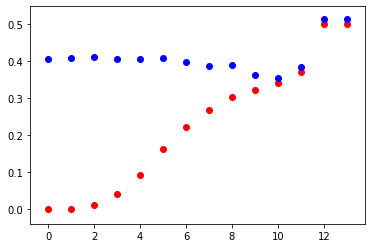

In [10]:
minParents = np.array([1,2,4,8,16,32,64,128,256,512,1024,2048,4096,8192])
trainingErrors = []
validationErrors = []
for i in minParents:
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50, minParent=i)
    trainingErrors.append(learner.err(Xtr,Ytr))
    validationErrors.append(learner.err(Xva,Yva))
plt.scatter(np.array(range(len(minParents))), np.array(trainingErrors), c='r')
plt.scatter(np.array(range(len(minParents))), np.array(validationErrors), c='b')
plt.show()

Having understood that increased depth means increased complexity, it is only logical that fundamentally decreasing the depth by increasing the minParent parameter decreases the model's complexity. Thus, it makes sense that the training data's error rate has a positive slope. Based off of the validation data, however, the ideal value for minParent is minParent=10 as we want to minimize the error.

### 2.6 We discussed in class that we could understand our model’s performance as we vary our preference for false positives compared to false negatives using the ROC curve, or summarize this curve using a scalar area under curve(AUC) score. For the best decision tree model trained in the previous parts, use the roc function to plot an ROC curve summarizing your classifier performance on the training points, and another ROC curve summarizing your performance on the validation points. Then using the auc function, compute and report the AUC scores for the training and validation data.

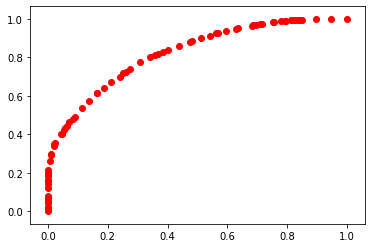

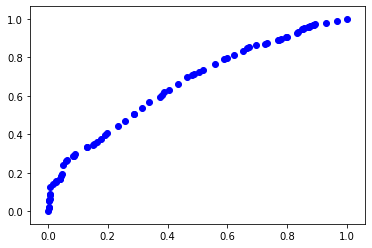

In [14]:
learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50, minParent=128)
tup1 = learner.roc(Xtr, Ytr)
fpr1 = np.array(tup1[0])
tpr1 = np.array(tup1[1])
plt.scatter(fpr1, tpr1, c='r')
plt.show()

tup2 = learner.roc(Xva, Yva)
fpr2 = np.array(tup2[0])
tpr2 = np.array(tup2[1])
plt.scatter(fpr2, tpr2, c='b')
plt.show()

In [13]:
auctr = learner.auc(Xtr, Ytr)
aucva = learner.auc(Xva, Yva)
print("Training AUC score:",auctr," ;  Validation AUC score:", aucva)

Training AUC score: 0.8224405608616135  ;  Validation AUC score: 0.6676702362704529


### 2.7 Pick maxDepth and minParent values that you think will perform well. Retrain your decision tree model using all the data in X_train.txt. Score your performance on the same data (accuracy rate and AUC).

In [16]:
learner2 = ml.dtree.treeClassify(X, Y, maxDepth=50, minParent=1024)

In [11]:
Xte = np.genfromtxt('data/X_test.txt', delimiter=',')
Yte = np.vstack((np.arange(Xte.shape[0]), learner2.predictSoft(Xte)[:,1])).T

In [12]:
np.savetxt('Y_submit.txt',Yte,'%d,%.2f',header='Id,Predicted',comments='',delimiter=',')

## Problem 3: Ensemble Methods / Option 1: Random Forest Classifier

### 3.1 Plot the training and validation error as a function of the number of learners you include in the ensemble, for (at least) 1, 5, 10, and 25 learners.

In [11]:
np.random.seed(0)  # Resetting the seed in case you ran other stuff.
n_bags = 25
bags = []   # self.learners
for l in range(n_bags):
    # Each boosted data is the size of the original data. 
    Xi, Yi = ml.bootstrapData(Xtr, Ytr, Xtr.shape[0])

    # Train the model on that draw
    tree = ml.dtree.treeClassify(Xi, Yi, minParent=128, maxDepth=50, nFeatures=30)
    bags.append(tree)

In [12]:
trainingErrors = []
validationErrors = []
for tree in bags:
    trainingErrors.append(tree.err(Xtr,Ytr))
    validationErrors.append(tree.err(Xva,Yva))


Changes with every run!

Average Training error rate vs number of learners


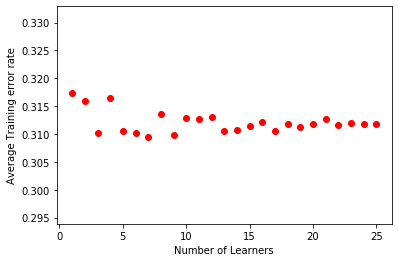

Average Validation error rate vs number of learners


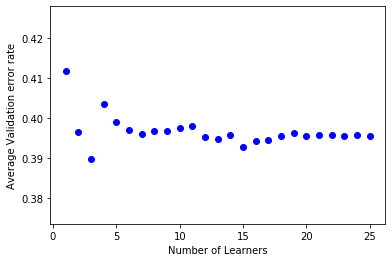

In [18]:
# learned how to use random.sample at https://stackoverflow.com/questions/306400/how-to-randomly-select-an-item-from-a-list
import random
indeces = range(25)
bagcounts = range(1, 26)
plotTrEs = []
plotVaEs = []

for bc in bagcounts:
    indeces_to_pick = random.sample(indeces, bc)
    sumTrE = 0
    sumVaE = 0
    for ind in indeces_to_pick:
        sumTrE += trainingErrors[ind]
        sumVaE += validationErrors[ind]
    plotTrEs.append(1.0*sumTrE/bc)
    plotVaEs.append(1.0*sumVaE/bc)

print("Changes with every run!\n")
print("Average Training error rate vs number of learners")
plt.scatter(np.array(bagcounts), plotTrEs, c='r')
plt.ylabel("Average Training error rate")
plt.xlabel("Number of Learners")
plt.show()
print("Average Validation error rate vs number of learners")
plt.scatter(np.array(bagcounts), plotVaEs, c='b')
plt.ylabel("Average Validation error rate")
plt.xlabel("Number of Learners")
plt.show()

### 3.2 Now choose an ensemble size and build an ensemble using the full training set, make predictions on the testdata, and evaluate (via Kaggle’s leaderboard) and report your performance.

In [9]:
# increase n_bags

np.random.seed(0)  # Resetting the seed in case you ran other stuff.
n_bags = 100
bags = []   # self.learners
for l in range(n_bags):
    # Each boosted data is the size of the original data. 
    Xi, Yi = ml.bootstrapData(X, Y, X.shape[0])

    # Train the model on that draw
    tree = ml.dtree.treeClassify(Xi, Yi, minParent=1024, maxDepth=50, nFeatures=30)
    bags.append(tree)

In [10]:
Xte = np.genfromtxt('data/X_test.txt', delimiter=',')
sumYte = np.vstack((np.arange(Xte.shape[0]), bags[0].predictSoft(Xte)[:,1])).T
for index in range(1, len(bags)):
    Yte = np.vstack((np.arange(Xte.shape[0]), bags[index].predictSoft(Xte)[:,1])).T
    for i in range(len(Yte)):
        sumYte[i] += Yte[i]
for i in range(len(sumYte)):
    sumYte[i] = 1.0 * sumYte[i] / n_bags
np.savetxt('Y_submit_2.txt',sumYte,'%d,%.2f',header='Id,Predicted',comments='',delimiter=',')

## Problem 4: Statement of Collaboration

I did not collaborate with anyone to complete this assignment.

In problem 3.1, I used the following stackoverflow page to learn how to get multiple random items from a list: https://stackoverflow.com/questions/306400/how-to-randomly-select-an-item-from-a-list

I also used the following page to figure out how to do problem 1: https://victorzhou.com/blog/information-gain/